# full chain of cross-section results of mc-bnb/mc-cosmic sample

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/'

# full chain of cross-section extraction - nominal

In [3]:
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['data date']='2018_08_16'

In [4]:
versions['Overlay']='prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev'
versions['overlay date']='2018_09_22'
extract_Xsec_full_chain(extra_name='mc_bnb_mc_cosmic',debug=0)

found selected overlay files from mc_bnb_mc_cosmic, loading them...
1747 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
no Pmu weights, computing them
done assiging Pmu weights and Pp weights and saving the files.
correction for phi(mu)~0: 2.02715254209
correction for phi(p)~0: 1.40462957937
saved  2257 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_09_22_mc_bnb_mc_cosmicselected_overlaymc_bnb_mc_cosmic.csv
saved  1747 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_09_22_mc_bnb_mc_cosmicselected_CC1pmc_bnb_mc_cosmic.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_mc_bnb_mc_cosmicselected_beam_onmc

In [5]:
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['overlay date']='2018_09_22'
extract_Xsec_full_chain(extra_name='',force_recalculated_weights=True)

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
no Pmu weights, computing them
done assiging Pmu weights and Pp weights and saving the files.
already performed correction for phi~0 and saved the samples...
saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PmuXsecs_1D.txt
saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1D.txt


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/mccosmic_vs_datacosmic_mu_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/mccosmic_vs_datacosmic_mu_with_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/mccosmic_vs_datacosmic_p_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/mccosmic_vs_datacosmic_p_with_last_ctu_bin.pdf


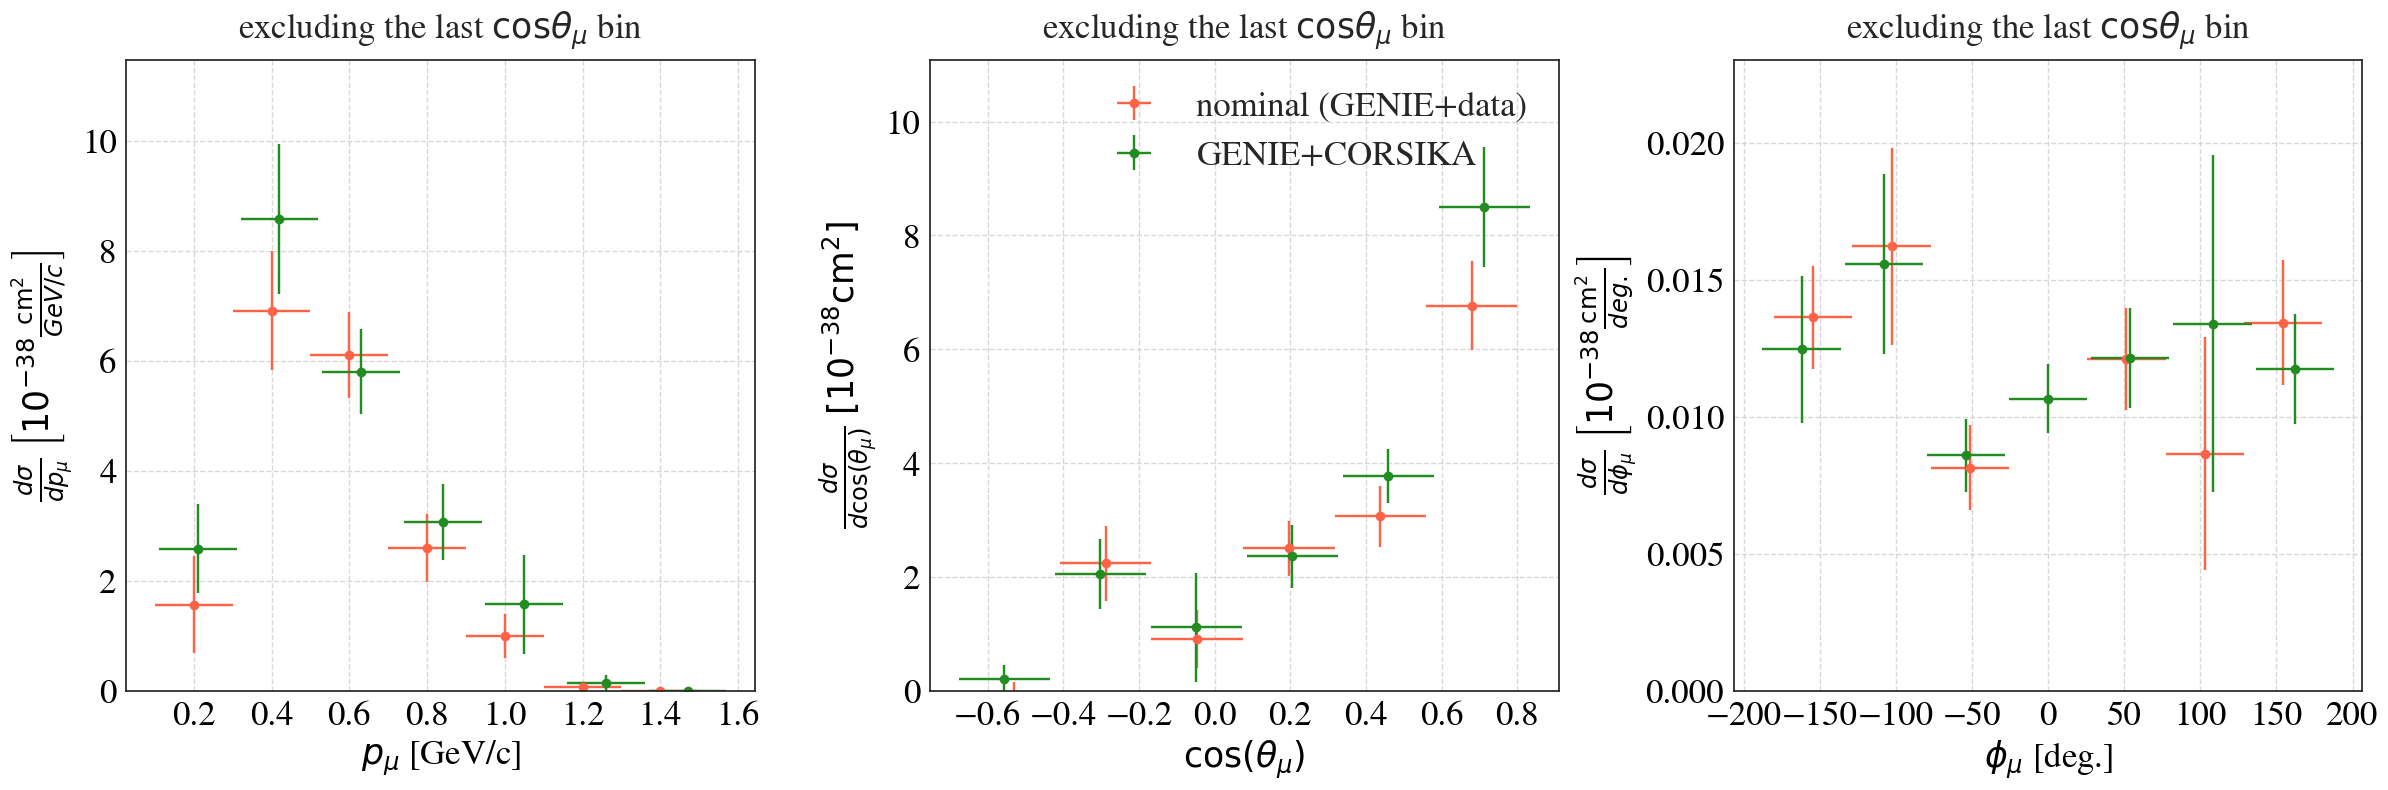

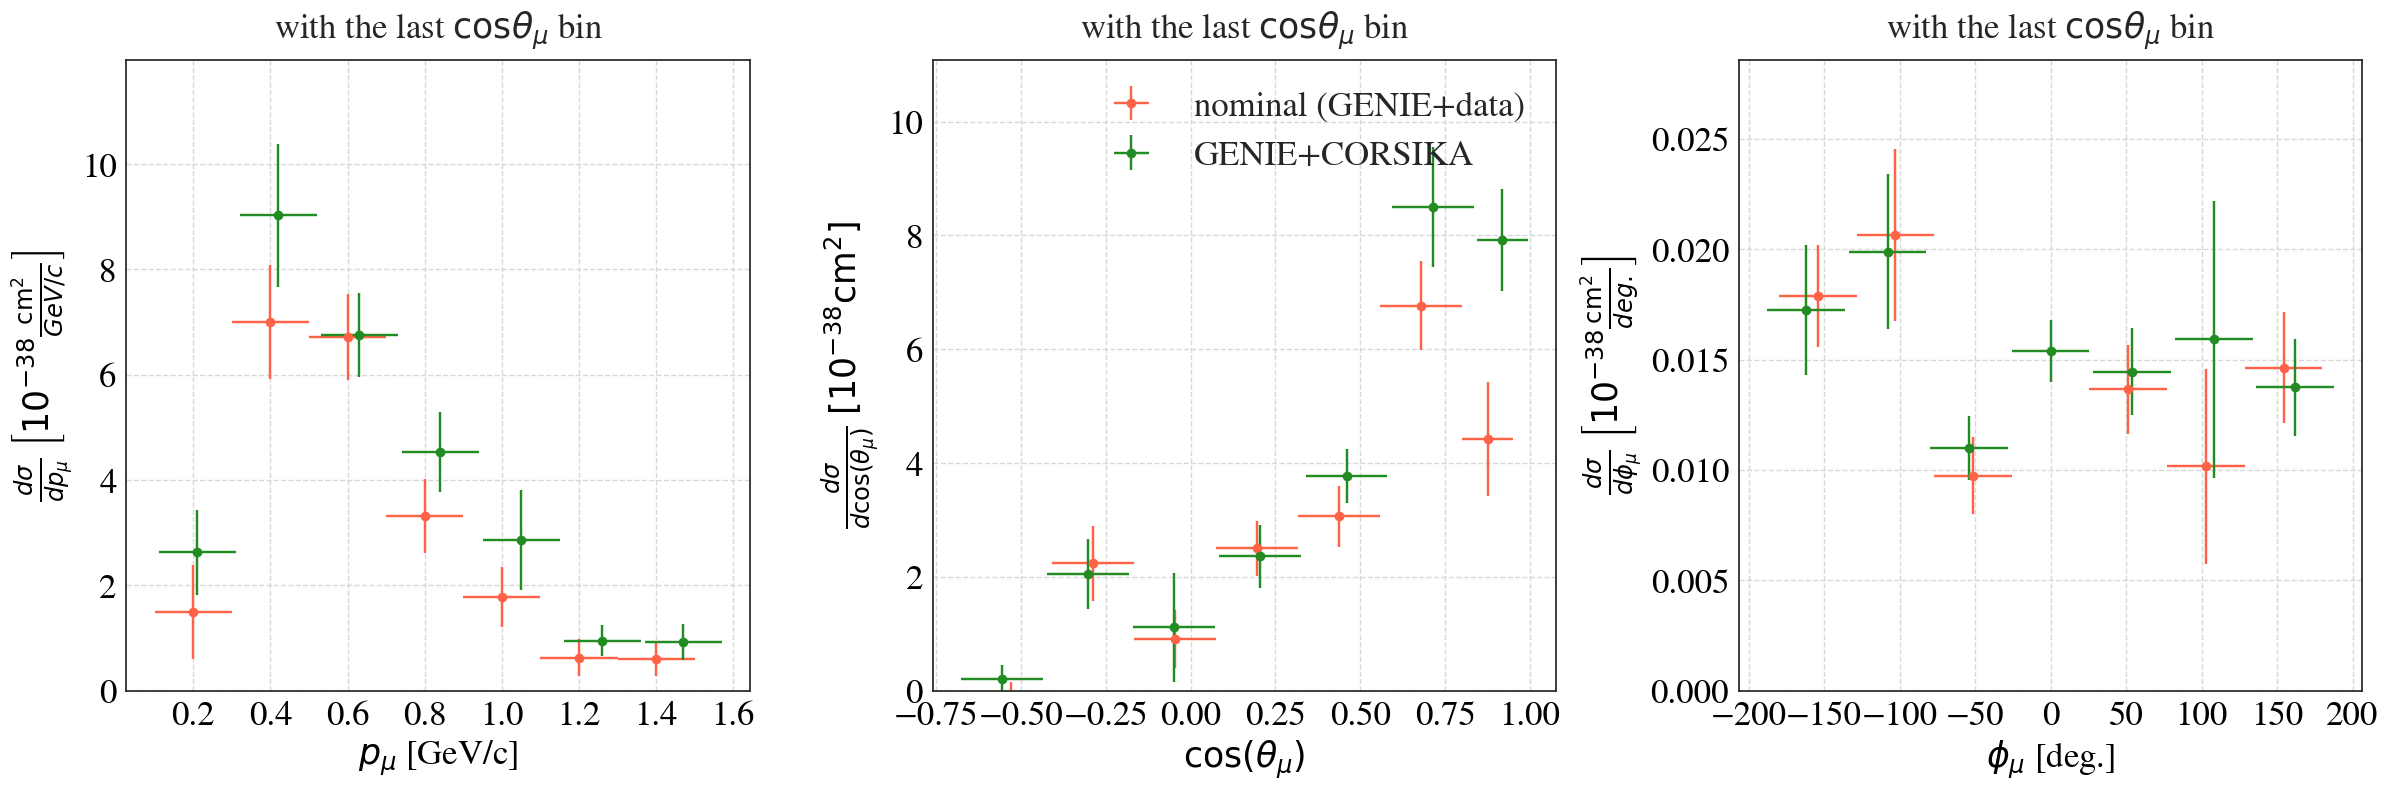

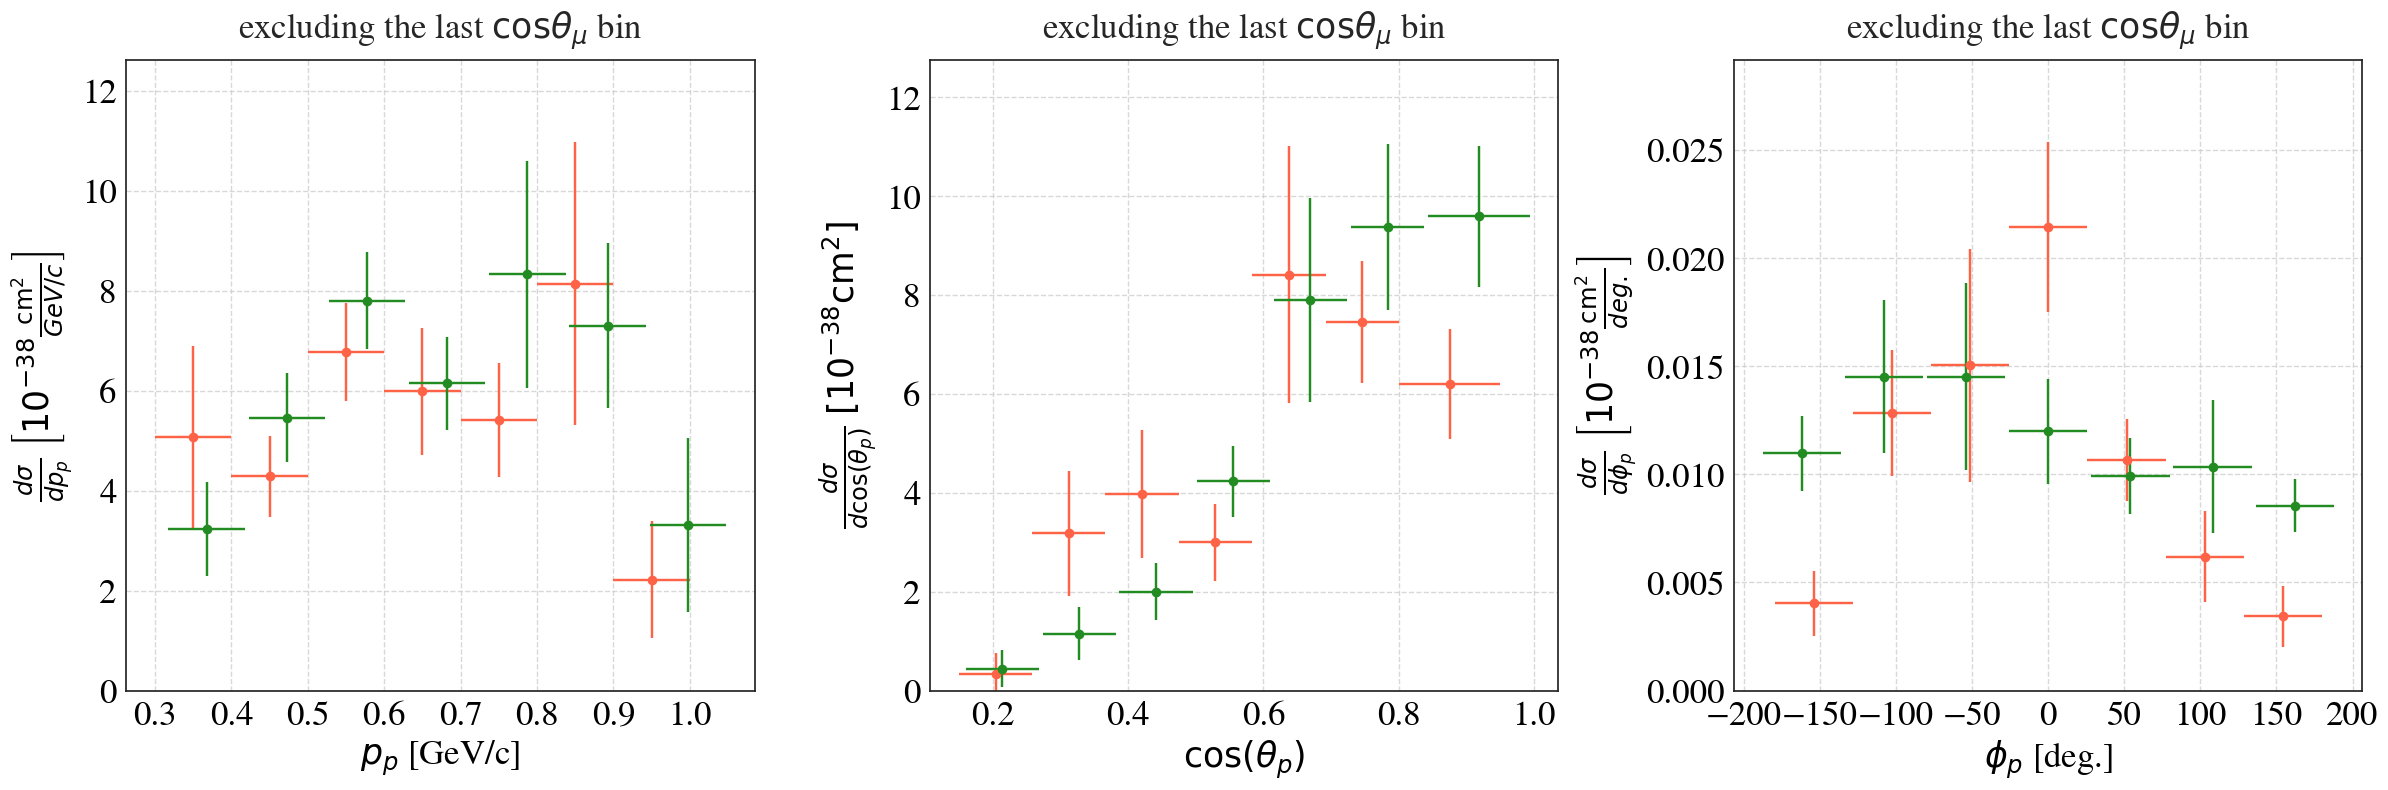

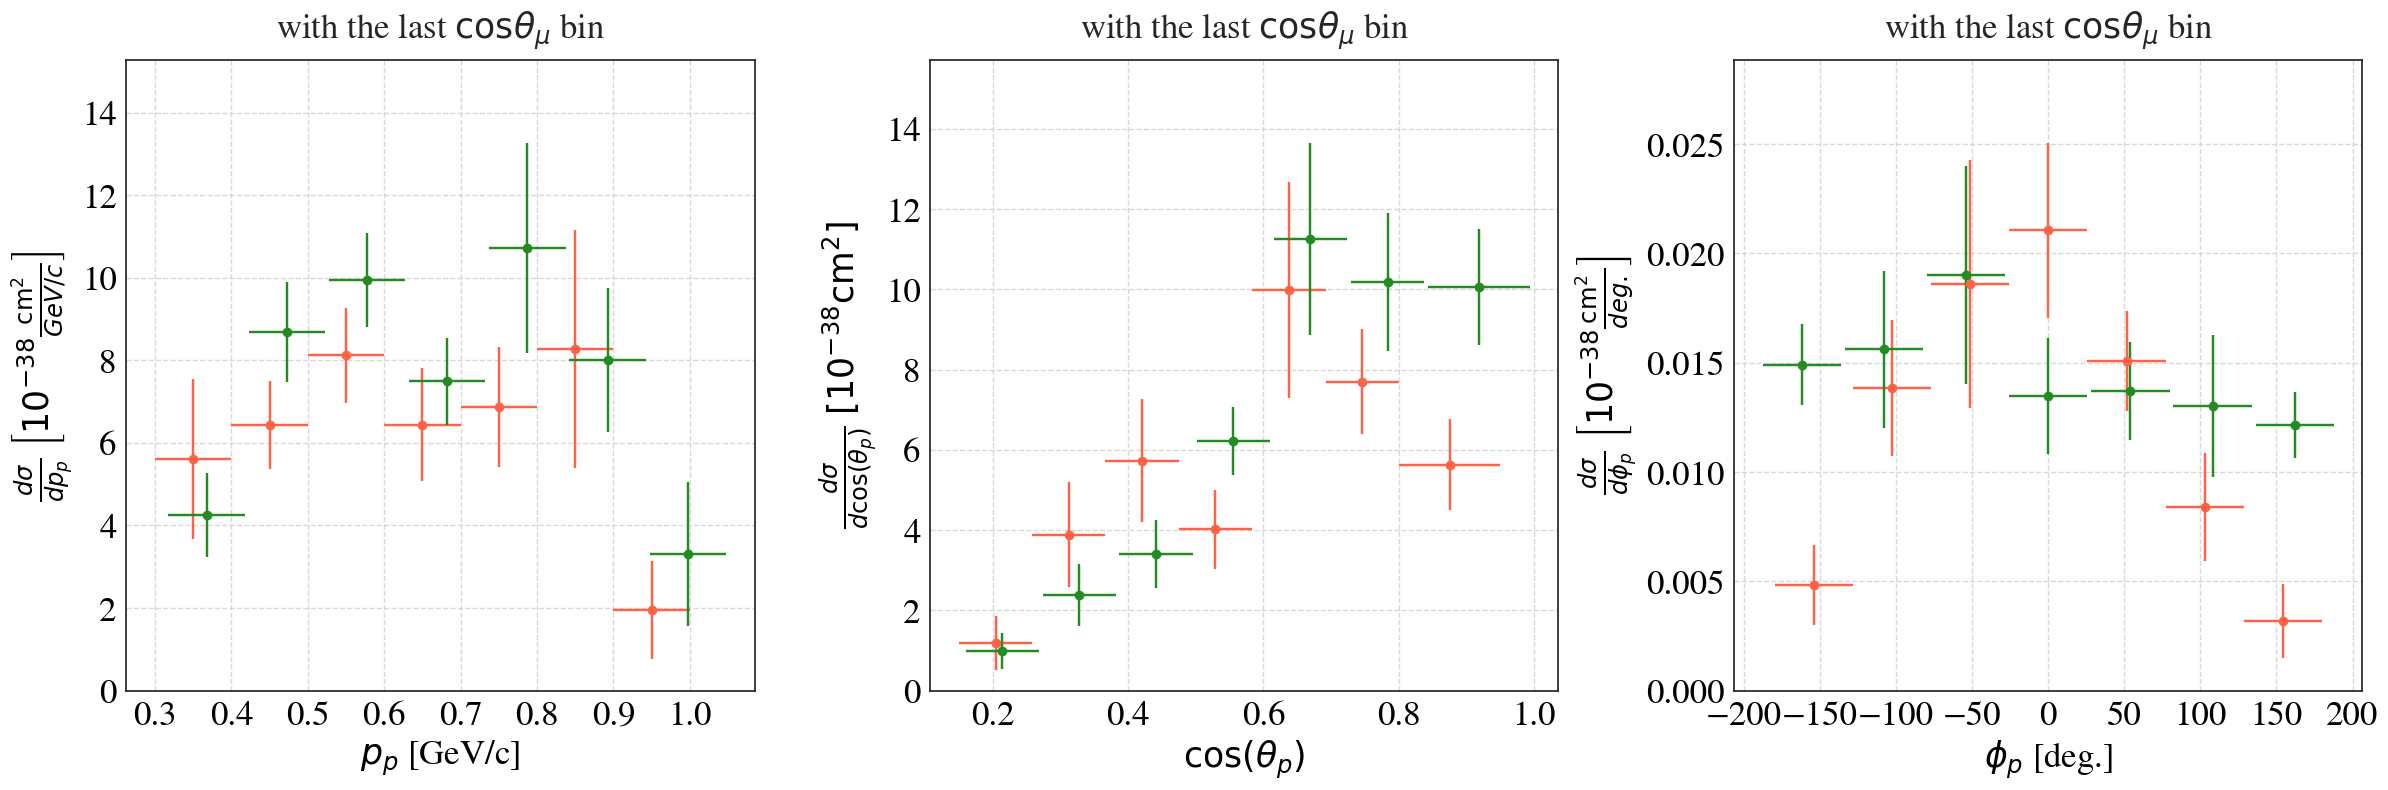

In [6]:
do_last_ctu_bin = True
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D" + "mc_bnb_mc_cosmic" + ".txt", 'rb') as infile:#{
        mccosmic_Xsec_dicts = pickle.load(infile)
    #}
    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
            
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
            ax = fig.add_subplot(1,3,i+1)
            
            for iana,(Xsec_dict,label,color) in enumerate(zip([nominal_Xsec_dicts[Xsec_title],mccosmic_Xsec_dicts[Xsec_title]],                                            
                                                     ['nominal (GENIE+data)','GENIE+CORSIKA'],
                                                     [Colors['beam on'],'forestgreen']                            
                                                    )):
                h = dict()
                h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
                #                 h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
                if iXsec==0 and var=='reco_Pmu_cos_theta':
                    h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                #                     h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                plt.errorbar(x=mid*(1+0.05*iana),
                             xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=color,fmt='o',label=label)
                #                 ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
        plt.tight_layout(h_pad=0)
        save_figure(figures_path + 'mccosmic_vs_datacosmic_'+particle+'_'+Xsec_fname+'.pdf')

# save the differences as systematical uncertainties into a csv

In [7]:
Xsec_sys_unc = dict()
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D" + "mc_bnb_mc_cosmic" + ".txt", 'rb') as infile:#{
        mccosmic_Xsec_dicts = pickle.load(infile)
    #}
        
    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        nominal_Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        mccosmic_Xsec_dict = mccosmic_Xsec_dicts[Xsec_title]
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']
                                     ):#{
            var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['nominal Xsec'],h['nominal Xsec err'] = nominal_Xsec_dict[observable],nominal_Xsec_dict[observable+' err']
            h['mc-cosmic Xsec'],h['mc-cosmic Xsec err'] = mccosmic_Xsec_dict[observable],mccosmic_Xsec_dict[observable+' err']

            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['nominal Xsec']=h['nominal Xsec'][:-1];h['nominal Xsec err']=h['nominal Xsec err'][:-1]
                h['mc-cosmic Xsec']=h['mc-cosmic Xsec'][:-1];h['mc-cosmic Xsec err']=h['mc-cosmic Xsec err'][:-1]

            Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err'] = np.abs(h['nominal Xsec'] - h['mc-cosmic Xsec'])
print 'done.'

done.


In [8]:
outfilename = Paths['systematics'] + "mc_bnb_mc_cosmic_systematical_uncertainty.txt"
with open(outfilename, 'w') as outfile:
    outfile.write(pickle.dumps(Xsec_sys_unc))
print 'saved',outfilename

saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/systematics/mc_bnb_mc_cosmic_systematical_uncertainty.txt


In [9]:
with open(Paths['systematics'] + "mc_bnb_mc_cosmic_systematical_uncertainty.txt", 'rb') as infile: 
    Xsec_sys_unc = pickle.load(infile)
Xsec_sys_unc

{'reco_Pmu_cos_thetawith_last_ctu_bin Xsec sys. err': array([ 0.60448687,  0.19475221,  0.19968257,  0.13293647,  0.70932886,
         1.73737817,  3.50189682]),
 'reco_Pmu_cos_thetawithout_last_ctu_bin Xsec sys. err': array([ 0.60448687,  0.19475221,  0.19968257,  0.13293647,  0.70932886,
         1.73737817]),
 'reco_Pmu_mcs_phiwith_last_ctu_bin Xsec sys. err': array([ 0.00064371,  0.00074968,  0.00126863,  0.01842898,  0.00079395,
         0.0057468 ,  0.00089654]),
 'reco_Pmu_mcs_phiwithout_last_ctu_bin Xsec sys. err': array([  1.17211121e-03,   6.45877997e-04,   4.42406099e-04,
          1.20110039e-02,   5.15781435e-05,   4.74266819e-03,
          1.69510943e-03]),
 'reco_Pmu_mcswith_last_ctu_bin Xsec sys. err': array([ 1.13258687,  2.022361  ,  0.04439528,  1.22356019,  1.08745982,
         0.32294585,  0.32485702]),
 'reco_Pmu_mcswithout_last_ctu_bin Xsec sys. err': array([ 1.01670781,  1.66299994,  0.29954837,  0.48216792,  0.57488752,
         0.08083685,  0.01369174]),
 'rec